In [1]:
%cd /orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw19_Ha/

/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw19_Ha


In [2]:
%ls

H30a.spec.pdf  g5a.Ha.spw19.im/


In [3]:
from spectral_cube import SpectralCube

In [4]:
from astropy import units as u

In [5]:
cube = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw19_Ha/g5a.Ha.spw19.im', format='casa_image')
cube

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskSpectralCube with shape=(2048, 77, 278) and unit=Jy / beam and chunk size (256, 77, 278):
 n_x:    278  type_x: GLON-SIN  unit_x: deg    range:     5.269850 deg:    5.484556 deg
 n_y:     77  type_y: GLAT-SIN  unit_y: deg    range:    -0.432158 deg:   -0.373251 deg
 n_s:   2048  type_s: FREQ      unit_s: Hz     range: 230858100419.400 Hz:232857205583.850 Hz

In [6]:
restfreq_h30a = 231.900928*u.GHz

In [7]:
cube_kms = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restfreq_h30a)
cube_kms

DaskSpectralCube with shape=(2048, 77, 278) and unit=Jy / beam and chunk size (256, 77, 278):
 n_x:    278  type_x: GLON-SIN  unit_x: deg    range:     5.269850 deg:    5.484556 deg
 n_y:     77  type_y: GLAT-SIN  unit_y: deg    range:    -0.432158 deg:   -0.373251 deg
 n_s:   2048  type_s: VRAD      unit_s: km / s  range:    -1236.238 km / s:    1348.127 km / s

In [8]:
avspec = cube_kms.mean(axis=(1,2))

In [9]:
u.brightness_temperature?

Signature: u.brightness_temperature(frequency, beam_area=None)
Docstring:
Defines the conversion between Jy/sr and "brightness temperature",
:math:`T_B`, in Kelvins.  The brightness temperature is a unit very
commonly used in radio astronomy.  See, e.g., "Tools of Radio Astronomy"
(Wilson 2009) eqn 8.16 and eqn 8.19 (these pages are available on `google
books
<https://books.google.com/books?id=9KHw6R8rQEMC&pg=PA179&source=gbs_toc_r&cad=4#v=onepage&q&f=false>`__).

:math:`T_B \equiv S_\nu / \left(2 k \nu^2 / c^2 \right)`

If the input is in Jy/beam or Jy (assuming it came from a single beam), the
beam area is essential for this computation: the brightness temperature is
inversely proportional to the beam area.

Parameters
----------
frequency : `~astropy.units.Quantity`
    The observed ``spectral`` equivalent `~astropy.units.Unit` (e.g.,
    frequency or wavelength).  The variable is named 'frequency' because it
    is more commonly used in radio astronomy.
    BACKWARD COMPATIBILITY N

In [10]:
cube.beam

Beam: BMAJ=28.112614999999202 arcsec BMIN=28.112614999999202 arcsec BPA=-59.76623432930376 deg

In [11]:
avspec_K = avspec.to(u.K, u.brightness_temperature(cube.spectral_axis, beam_area=cube.beam.sr))

In [12]:
%matplotlib inline
import pylab as pl
#pl.style.use('white_background')

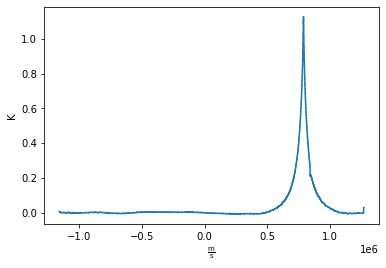

In [13]:
avspec_K.quicklook()

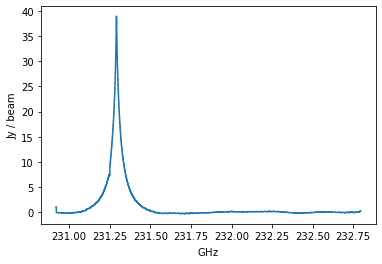

In [14]:
avspec.with_spectral_unit(u.GHz).quicklook()

In [15]:
from astropy.visualization import quantity_support

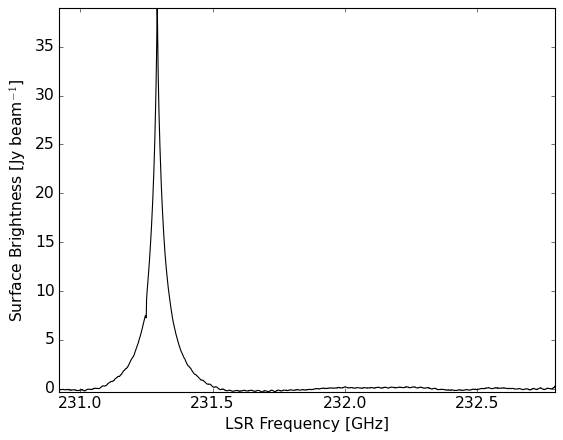

In [16]:
with quantity_support():
    with pl.style.context('classic'):
        pl.rcParams['font.size'] = 14
        pl.figure(figsize=(8,6), facecolor='w')
        pl.plot(avspec.with_spectral_unit(u.GHz).spectral_axis, avspec, color='k')
        #pl.fill_between(avspec.with_spectral_unit(u.GHz).spectral_axis, np.zeros_like(avspec), avspec, color='y')
        pl.ylabel("Surface Brightness [Jy beam$^{-1}$]")
        pl.xlabel("LSR Frequency [GHz]")
        ax = pl.gca()
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        
#pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/H30a.spec.pdf')

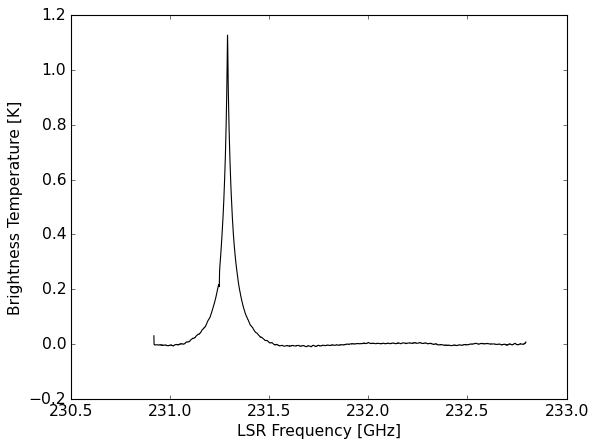

In [17]:
with quantity_support():
    with pl.style.context('classic'):
        pl.rcParams['font.size'] = 14
        pl.figure(figsize=(8,6), facecolor='w')
        pl.plot(avspec.with_spectral_unit(u.GHz).spectral_axis, avspec_K, color='k')
        #pl.fill_between(avspec.with_spectral_unit(u.GHz).spectral_axis, np.zeros_like(avspec), avspec, color='y')
        pl.ylabel("Brightness Temperature [K]")
        pl.xlabel("LSR Frequency [GHz]")
        ax = pl.gca()
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/H30a.spec.pdf')

In [18]:
#cocube = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw17_12CO/g5a.K.12CO.spw17.im', format='casa_image')
#cocube = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw27_SiO/g5a.SiO.spw27.im', format='casa_image')
cocube = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/spw19_Ha/g5a.Ha.spw19.im', format='casa_image')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


INFO: Auto-setting vmin to  3.325e+01 [aplpy.core]
INFO: Auto-setting vmax to  5.232e+01 [aplpy.core]


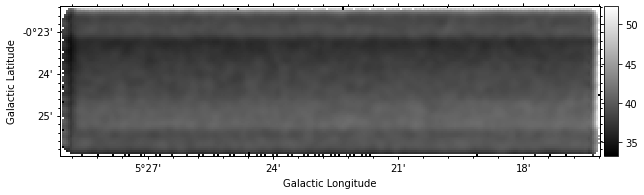

In [19]:
cocube.max(axis=0).quicklook()

In [20]:
avspec_co = cocube[:,20:30,160:170].mean(axis=(1,2))

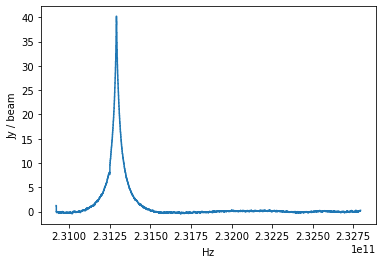

In [21]:
avspec_co.quicklook()

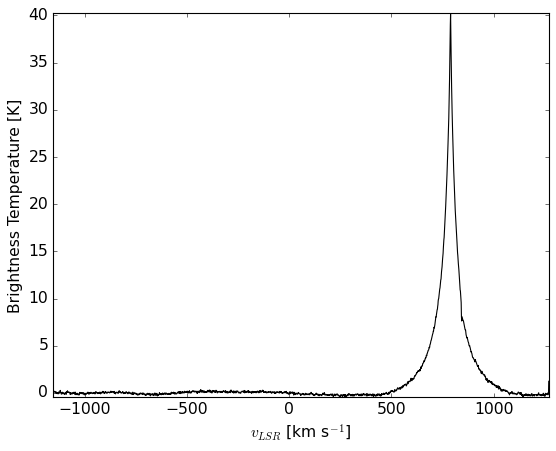

In [22]:
with quantity_support():
    with pl.style.context('classic'):
        pl.rcParams['font.size'] = 14
        pl.figure(figsize=(8,6), facecolor='w')
        pl.plot(avspec_co.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=231.900928*u.GHz).spectral_axis, avspec_co, color='k')
        #pl.fill_between(avspec.with_spectral_unit(u.GHz).spectral_axis, np.zeros_like(avspec), avspec, color='y')
        pl.ylabel("Brightness Temperature [K]")
        pl.xlabel("$v_{LSR}$ [km s$^{-1}$]")
        ax = pl.gca()
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        #pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/H30a.spec.pdf')

In [23]:
cd /orange/adamginsburg/cmz/g5/code

/orange/adamginsburg/cmz/g5/code


In [24]:
att = open('/orange/adamginsburg/cmz/g5/code/plots/pgplot.data.txt')

In [25]:
att.read()

'# APEX, Llano de Chajnantor, alt. 5100m\n# First column frequency in GHz.\n# Following column(s) transmissions(s)\n# First row PWVs\n#            0.500    1.000    2.000 \n 231.000    0.962    0.942    0.904 \n 231.100    0.956    0.937    0.898 \n 231.200    0.940    0.921    0.883 \n 231.300    0.899    0.881    0.845 \n 231.400    0.948    0.929    0.891 \n 231.500    0.958    0.939    0.900 \n 231.600    0.962    0.943    0.904 \n 231.700    0.964    0.945    0.905 \n 231.800    0.965    0.945    0.906 \n 231.900    0.966    0.946    0.907 \n 232.000    0.966    0.946    0.907 \n'

In [26]:
import numpy as np

In [27]:
trms = np.loadtxt('/orange/adamginsburg/cmz/g5/code/plots/pgplot.data.txt')
trms

array([[231.   ,   0.962,   0.942,   0.904],
       [231.1  ,   0.956,   0.937,   0.898],
       [231.2  ,   0.94 ,   0.921,   0.883],
       [231.3  ,   0.899,   0.881,   0.845],
       [231.4  ,   0.948,   0.929,   0.891],
       [231.5  ,   0.958,   0.939,   0.9  ],
       [231.6  ,   0.962,   0.943,   0.904],
       [231.7  ,   0.964,   0.945,   0.905],
       [231.8  ,   0.965,   0.945,   0.906],
       [231.9  ,   0.966,   0.946,   0.907],
       [232.   ,   0.966,   0.946,   0.907]])

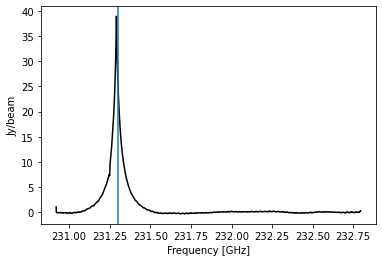

In [28]:
#pl.plot(trms[:,0]*u.GHz, trms[:,3]*20, color='black')
pl.plot(avspec.with_spectral_unit(u.GHz).spectral_axis, avspec, color='k')
pl.axvline(x=trms[3,0])
pl.xlabel('Frequency [GHz]')
pl.ylabel('Jy/beam')
pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/trms.pdf')

In [29]:
minpos = np.where(trms[:,3] == np.amin(trms[:,3]))
minpos

(array([3]),)